In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Customer-Churn-Records.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
print("Satir Sayisi:", df.shape[0])
print("Sütün Sayisi:", df.shape[1])

Satir Sayisi: 10000
Sütün Sayisi: 18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [7]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df["Card Type"].unique()          

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
df.isnull().sum() 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
df["Exited"].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

### Veri Görselleştirme 

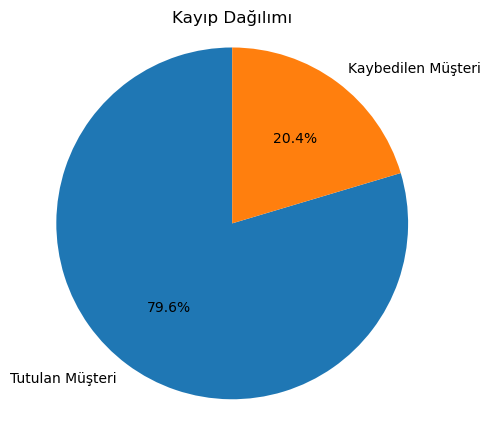

In [13]:
plt.figure(figsize=(5, 5))
dagilim= df["Exited"].value_counts()
plt.pie(dagilim, labels=["Tutulan Müşteri", "Kaybedilen Müşteri"], autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.title("Kayıp Dağılımı")
plt.show()

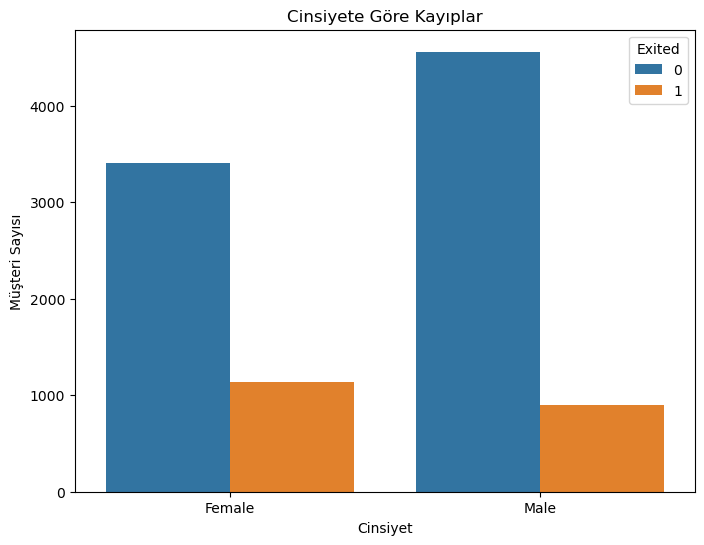

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Cinsiyete Göre Kayıplar")
plt.xlabel("Cinsiyet")
plt.ylabel("Müşteri Sayısı")
plt.show()

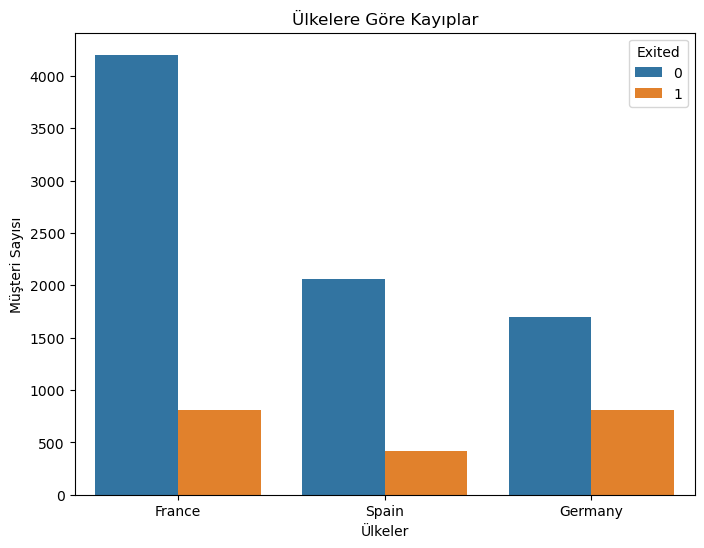

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Ülkelere Göre Kayıplar")
plt.xlabel("Ülkeler")
plt.ylabel("Müşteri Sayısı")
plt.show()

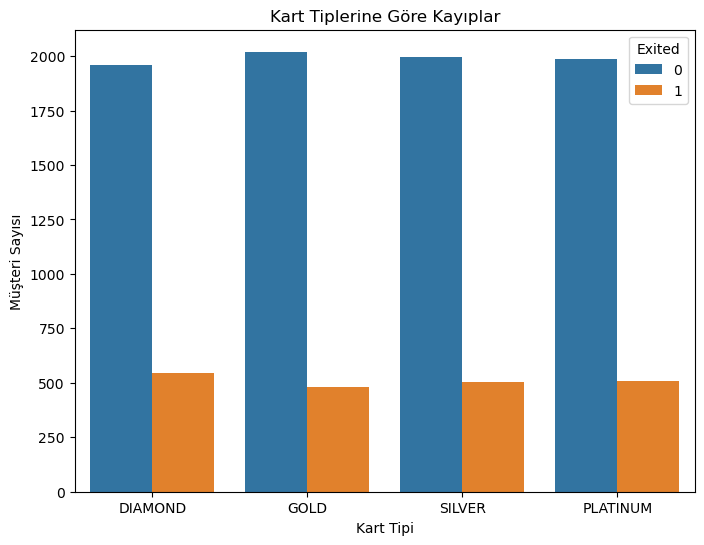

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Card Type", hue="Exited", data=df)
plt.title("Kart Tiplerine Göre Kayıplar")
plt.xlabel("Kart Tipi")
plt.ylabel("Müşteri Sayısı")
plt.show()

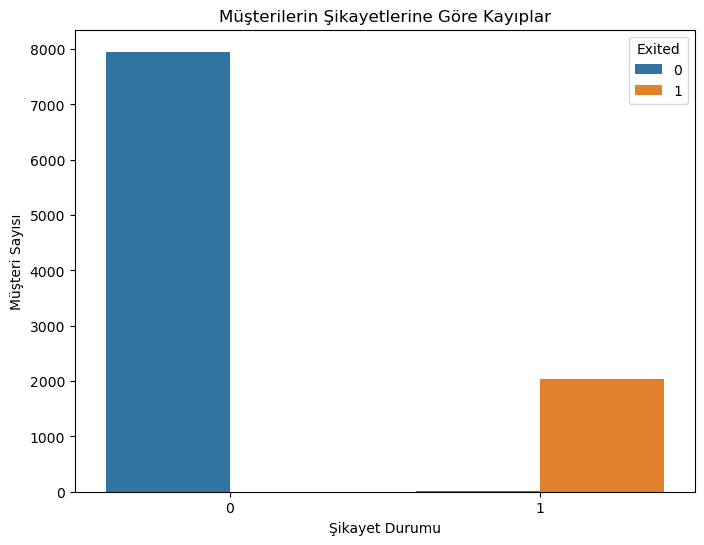

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Complain", hue="Exited", data=df)
plt.title("Müşterilerin Şikayetlerine Göre Kayıplar")
plt.xlabel("Şikayet Durumu")
plt.ylabel("Müşteri Sayısı")
plt.show()

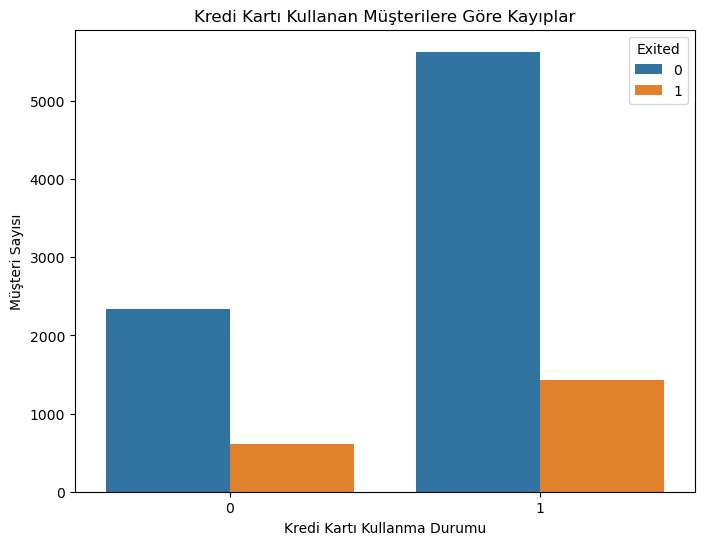

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HasCrCard", hue="Exited", data=df)
plt.title("Kredi Kartı Kullanan Müşterilere Göre Kayıplar")
plt.xlabel("Kredi Kartı Kullanma Durumu")
plt.ylabel("Müşteri Sayısı")
plt.show()

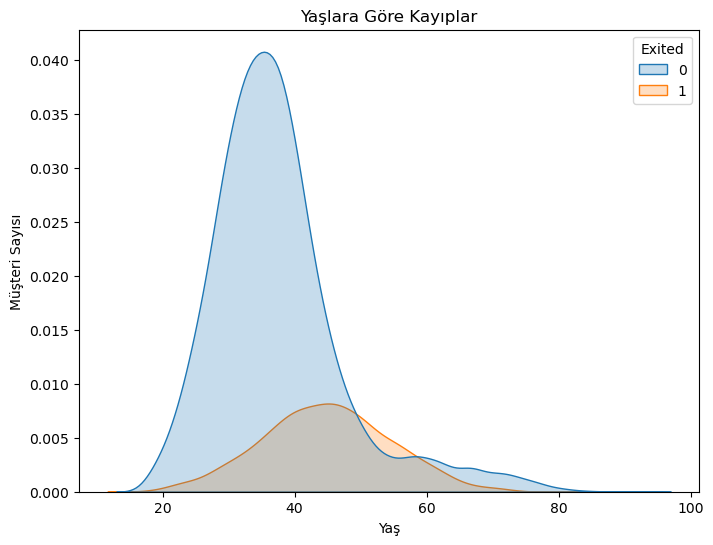

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x="Age",hue="Exited",data=df,shade=True);
plt.title("Yaşlara Göre Kayıplar")
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")
plt.show()

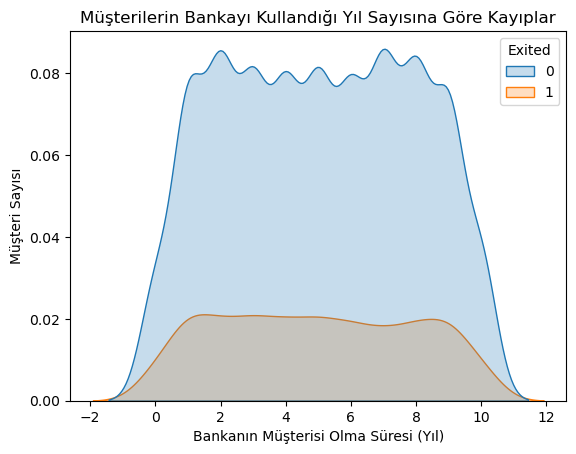

In [20]:
plt.figure()
sns.kdeplot(x="Tenure",hue="Exited",data=df,shade=True);
plt.title("Müşterilerin Bankayı Kullandığı Yıl Sayısına Göre Kayıplar")
plt.xlabel("Bankanın Müşterisi Olma Süresi (Yıl)")
plt.ylabel("Müşteri Sayısı")
plt.show()

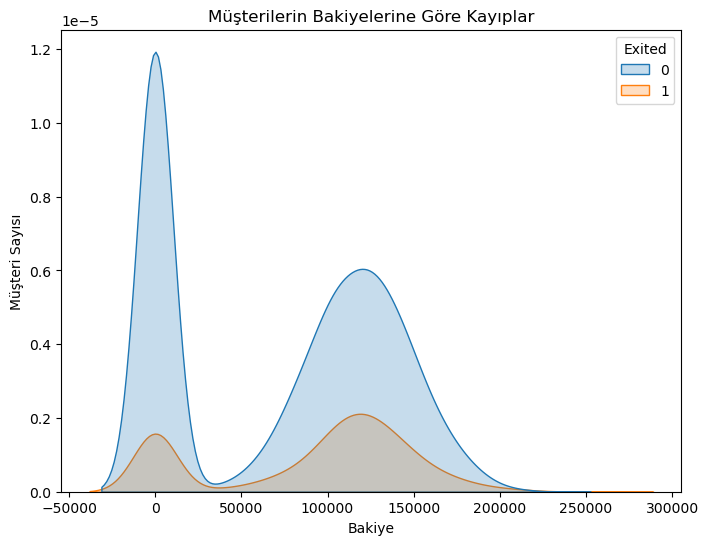

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x="Balance",hue="Exited",data=df,shade=True);
plt.title("Müşterilerin Bakiyelerine Göre Kayıplar")
plt.xlabel("Bakiye")
plt.ylabel("Müşteri Sayısı")
plt.show()

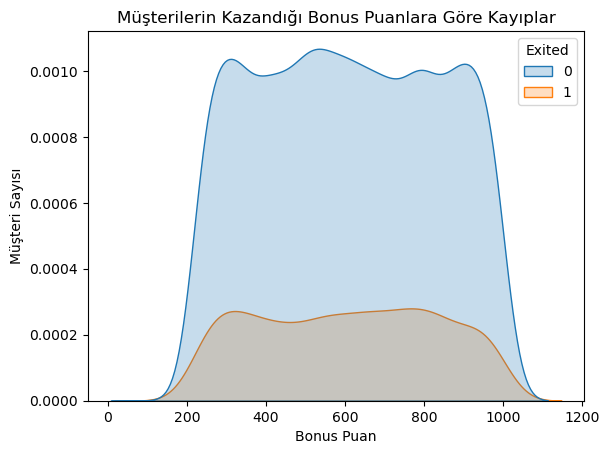

In [22]:
plt.figure()
sns.kdeplot(x="Point Earned",hue="Exited",data=df,shade=True);
plt.title("Müşterilerin Kazandığı Bonus Puanlara Göre Kayıplar")
plt.xlabel("Bonus Puan")
plt.ylabel("Müşteri Sayısı")
plt.show()

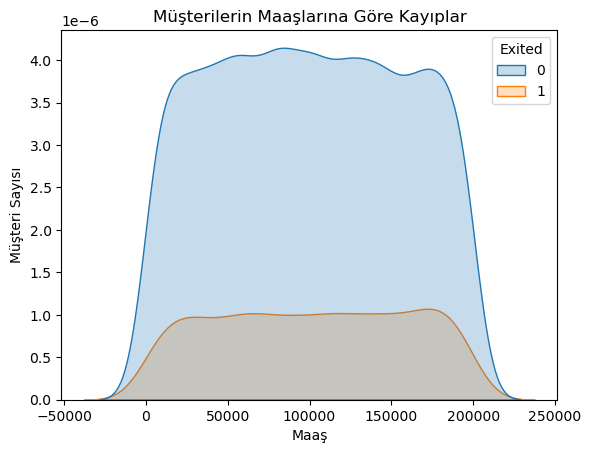

In [23]:
plt.figure()
sns.kdeplot(x="EstimatedSalary",hue="Exited",data=df,shade=True);
plt.title("Müşterilerin Maaşlarına Göre Kayıplar")
plt.xlabel("Maaş")
plt.ylabel("Müşteri Sayısı")
plt.show()

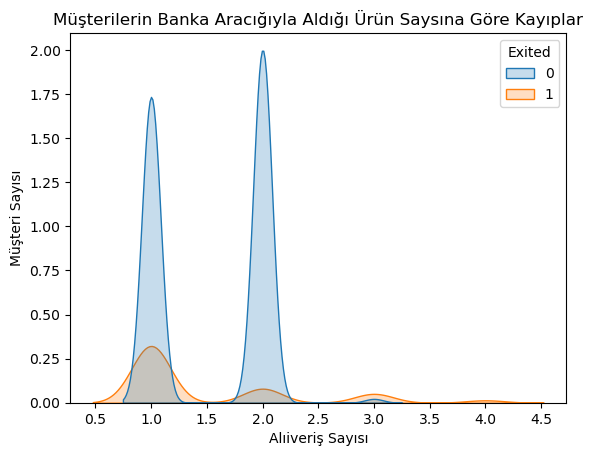

In [24]:
plt.figure()
sns.kdeplot(x="NumOfProducts",hue="Exited",data=df,shade=True);
plt.title("Müşterilerin Banka Aracığıyla Aldığı Ürün Saysına Göre Kayıplar")
plt.xlabel("Alıiveriş Sayısı")
plt.ylabel("Müşteri Sayısı")
plt.show()

### Veri Önişleme 

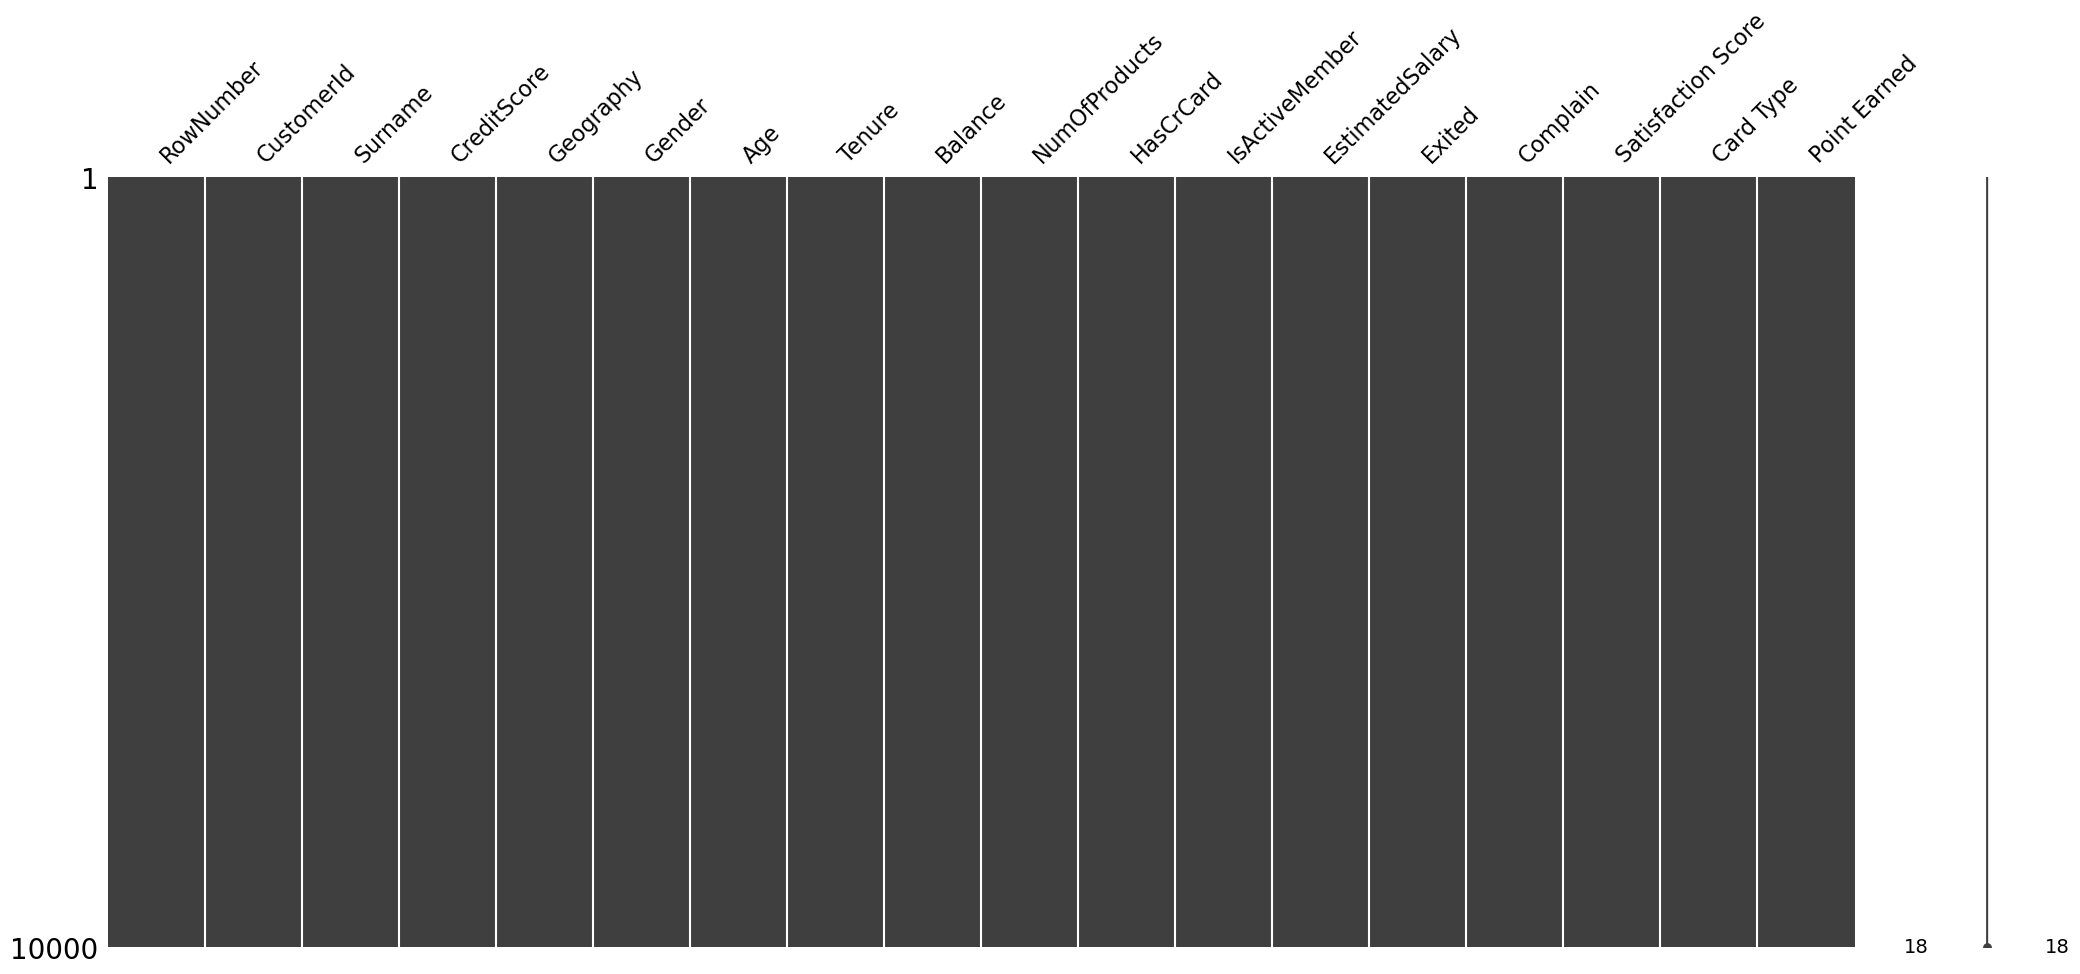

In [25]:
##eksik veri görselleştirmesi 

msno.matrix(df)
plt.show()

In [26]:
##kullanılmayacak sütunların atılması 

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [28]:
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'])

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


### Test Train 

In [30]:
X=df.drop("Exited",axis=1) 

In [31]:
y=df["Exited"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

In [33]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(3000, 20)
(3000,)
(7000, 20)
(7000,)


### Model

In [34]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [35]:
lgbm_model

LGBMClassifier()

In [36]:
y_pred = lgbm_model.predict(X_test)
print("LightGBM Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

LightGBM Doğruluk Skoru: %99.77


##### Model Tuning

In [37]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000], 
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [38]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [39]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [40]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [41]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 5)

In [42]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [43]:
y_pred = lgbm_tuned.predict(X_test)

In [44]:
print("LightGBM Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

LightGBM Doğruluk Skoru: %99.77
